**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   EQUIPO: 17

*   NOMBRE: David Hernández Castellanos
*   MATRÍCULA: A01795964
---------------------------------------------
*   NOMBRE: Renzo Felipe Chávez Pulgar
*   MATRÍCULA: A01795959
--------------------------------------------
*   NOMBRE: Abel Jhoan Díaz Escalera
*   MATRÍCULA: A00566705
--------------------------------------------
*   NOMBRE: Jessica Giovana García Gómez
*   MATRÍCULA: A01795922
--------------------------------------------

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 7/Actividad7_PCA"
#os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math as math

In [ ]:
cereals_df = pd.read_csv("https://github.com/Davhc/data_save/blob/main/Cereals.csv?raw=True")
#pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
cereals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,76.0,14.802632,3.907326,5.000000,12.000000,14.500000,17.000000,23.000000
sugars,76.0,7.026316,4.378656,0.000000,3.000000,7.000000,11.000000,15.000000
potass,75.0,98.666667,70.410636,15.000000,42.500000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


## Completitud

In [ ]:
def completitud(df):
    aux = df.isnull().sum().to_frame("n_nulos")
    aux["porcentaje_nulos"] = aux["n_nulos"]/df.shape[0]
    aux["porcentaje_nulos"] = (aux["porcentaje_nulos"]
                               .apply(lambda x: str(round(x*100, 1))+"%") )
    return aux


In [ ]:
completitud (cereals_df)

,n_nulos,porcentaje_nulos
name,0,0.0%
mfr,0,0.0%
type,0,0.0%
calories,0,0.0%
protein,0,0.0%
fat,0,0.0%
sodium,0,0.0%
fiber,0,0.0%
carbo,1,1.3%
sugars,1,1.3%


## Distribución

### Histogramas

In [ ]:
var_n = [x for x,y in zip(cereals_df.dtypes.index, cereals_df.dtypes) if y != "object"]
var_n.remove("shelf")

In [ ]:
def plot_hist(x,df):
    fig, ax = plt.subplots(figsize=(7,4))
    n_bins = 1 + int(np.log2(len(df[x])))
    ax.hist(df[x], bins=n_bins, density=True, color="#0039A6", alpha=0.8)
    sns.kdeplot(df[x],color="red")
    ax.set_facecolor('none')
    plt.title(f'Histograma de datos - {x}')
    ax.set_xlabel(x)
    ax.set_ylabel('Frecuencia')
    plt.legend(["Densidad","Histograma"])
    plt.tight_layout()

    plt.show()

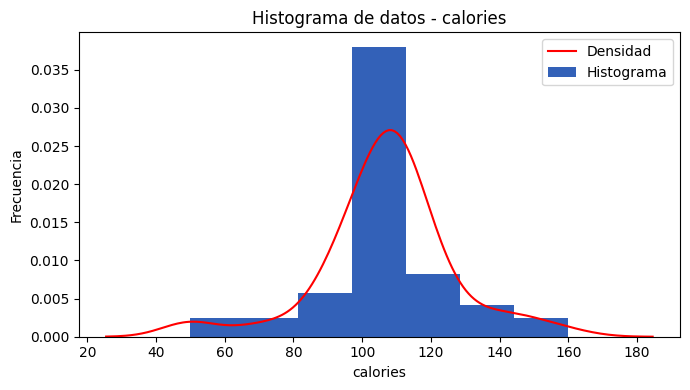

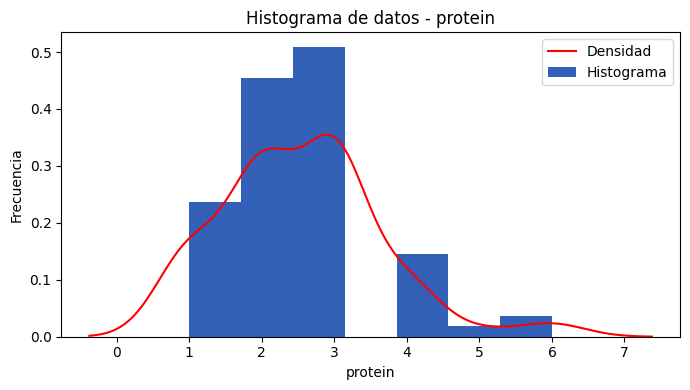

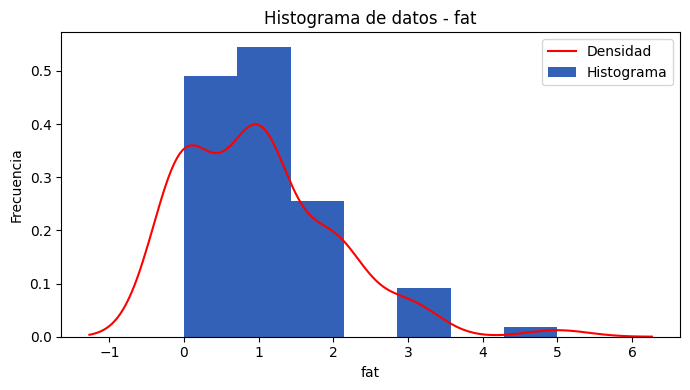

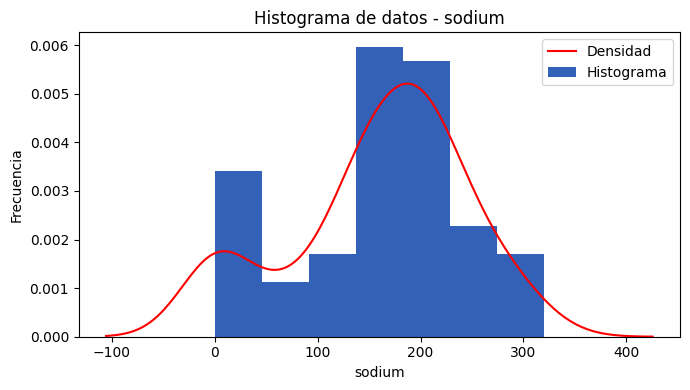

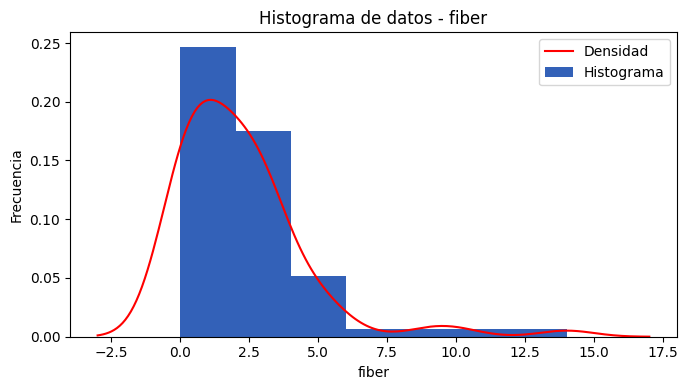

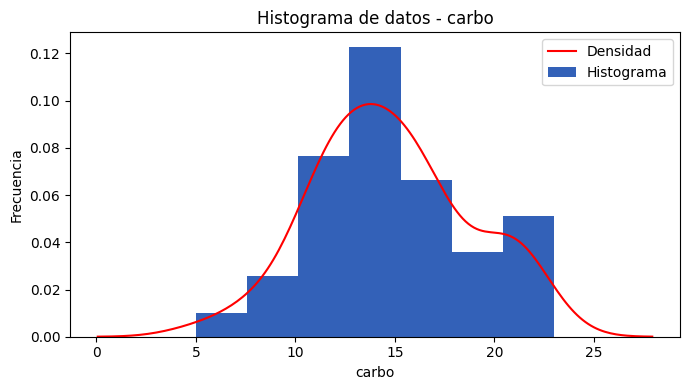

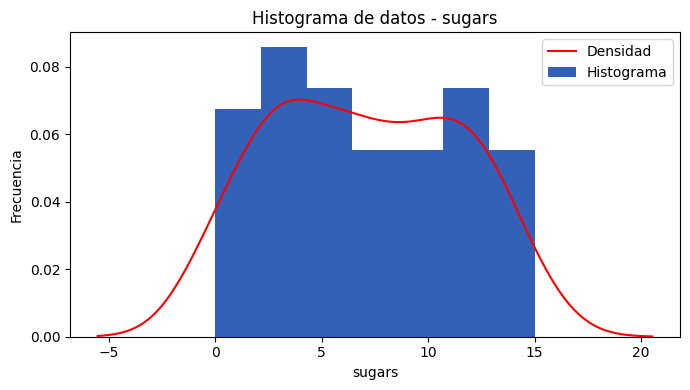

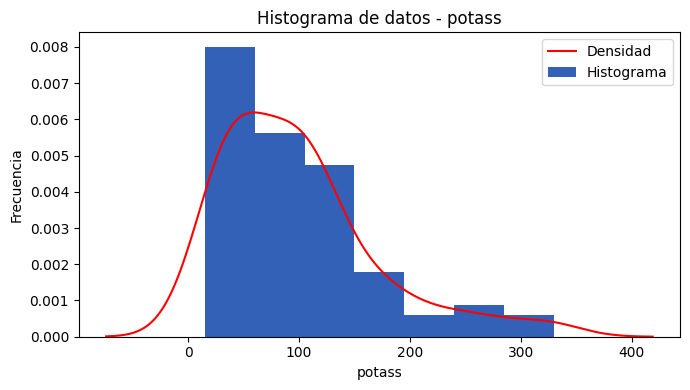

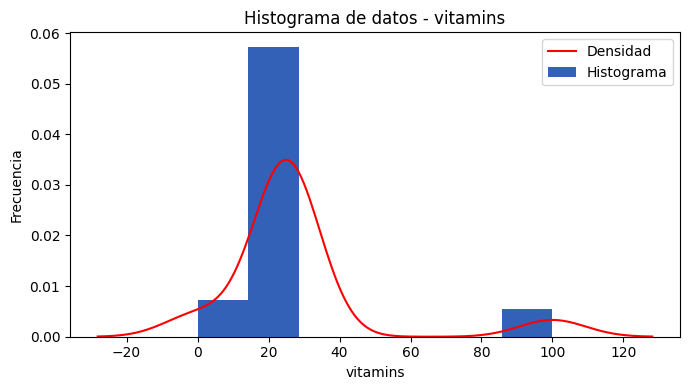

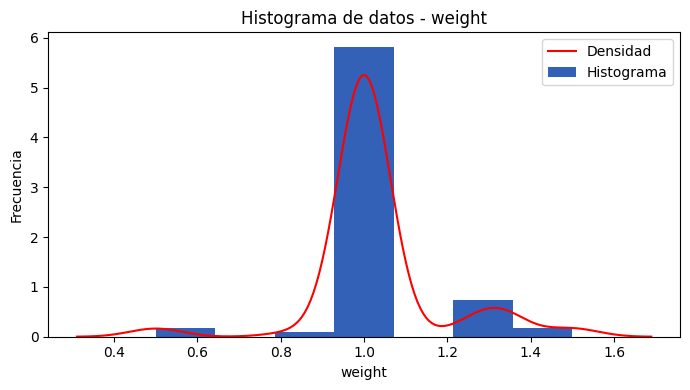

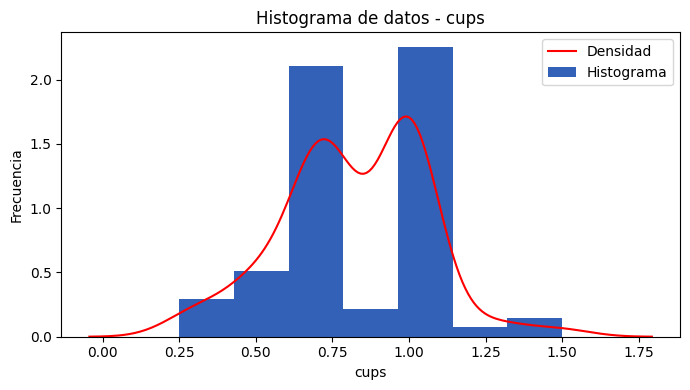

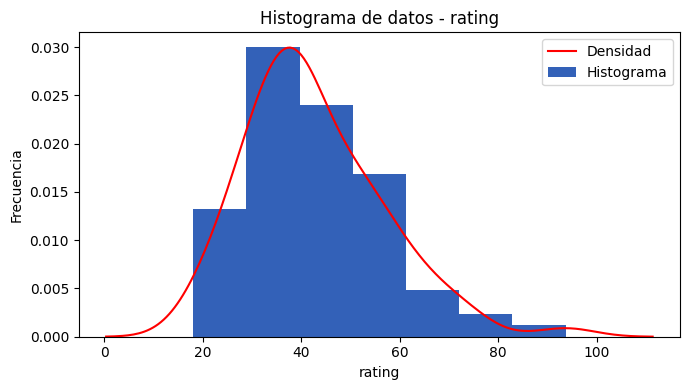

In [ ]:
for x in var_n:
    print("")
    plot_hist(x,cereals_df)


_______




### Boxplots

In [ ]:
def box_plot_s(x,df, outliers=True):
     sns.set_style("ticks")
     ax = sns.boxplot(data=df, y=x,
                 notch=True,
                 flierprops={"marker": "x"},
                 boxprops={"facecolor": "#c3e2fa"},
                 medianprops={"color": "r", "linewidth": 2},
                 showfliers=outliers
                 )
     ax.set_facecolor('none')
     plt.title(f'Boxplot de datos - {x}')
     plt.tight_layout()
     plt.show()

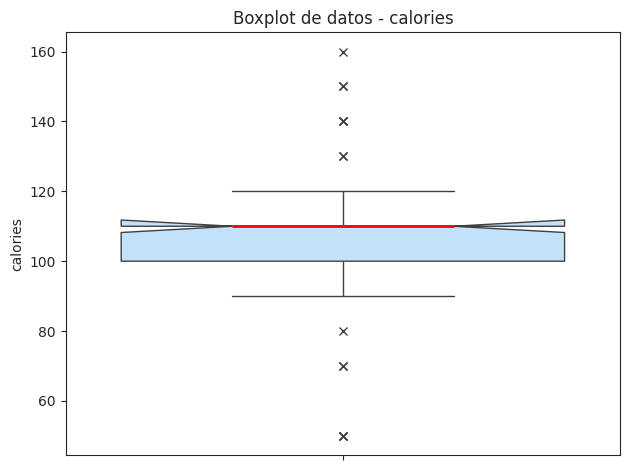

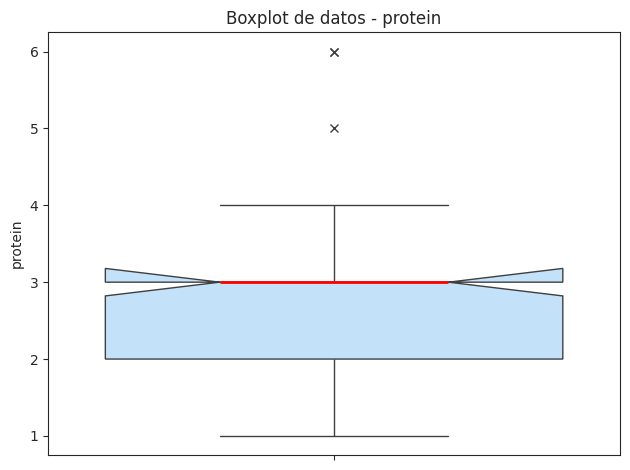

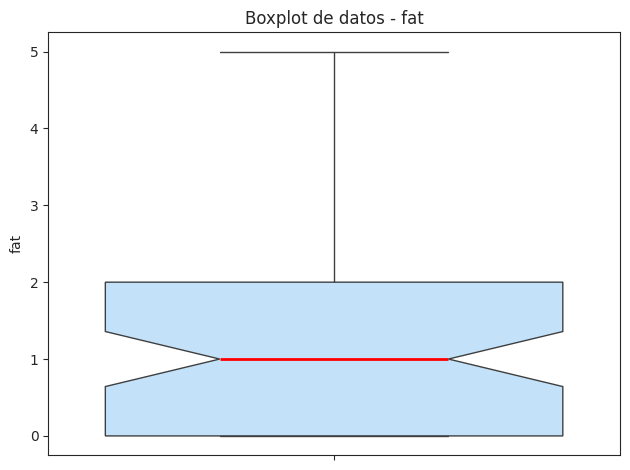

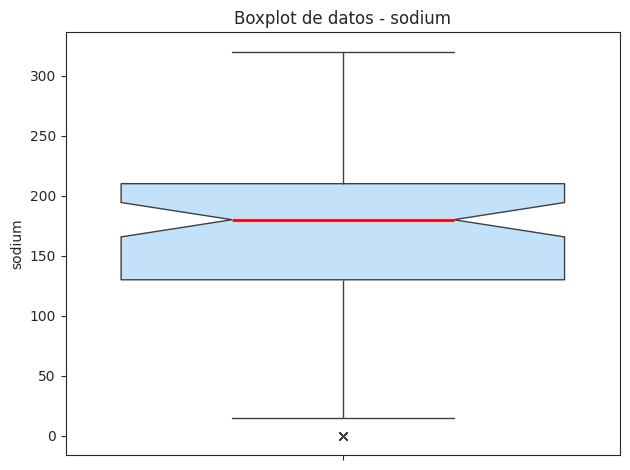

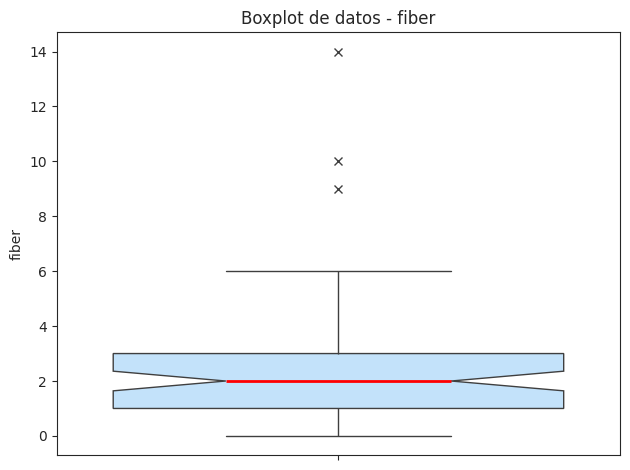

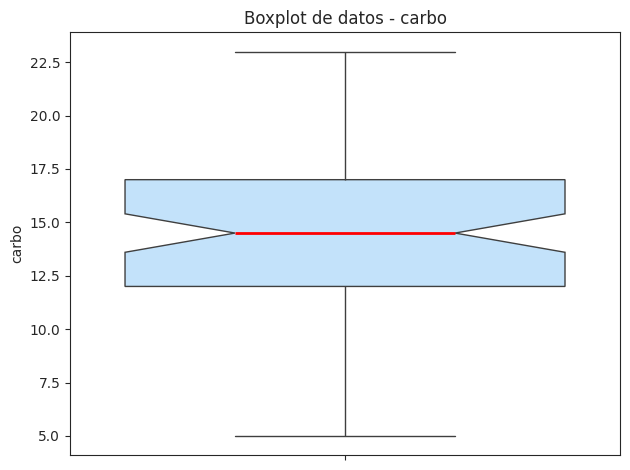

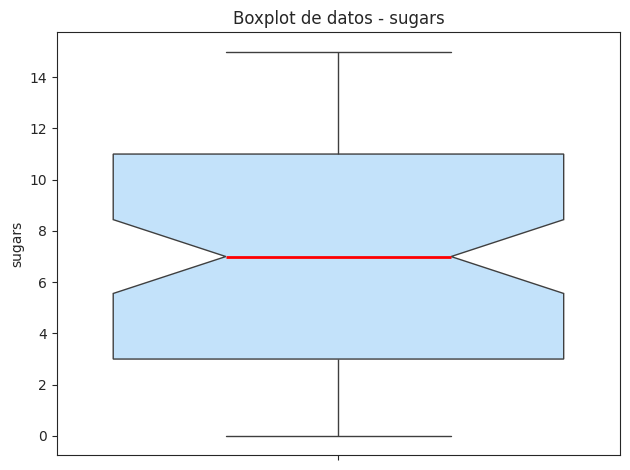

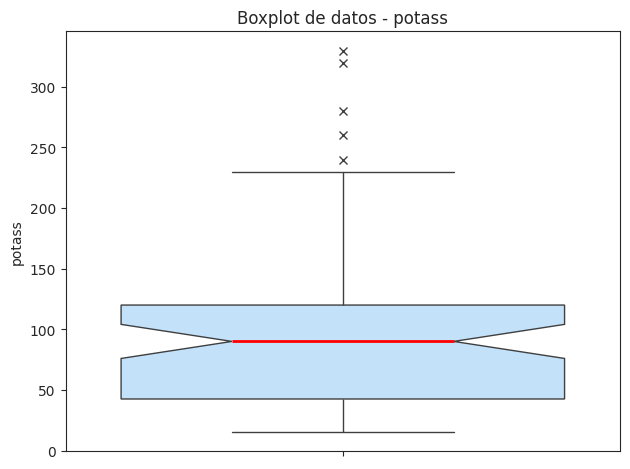

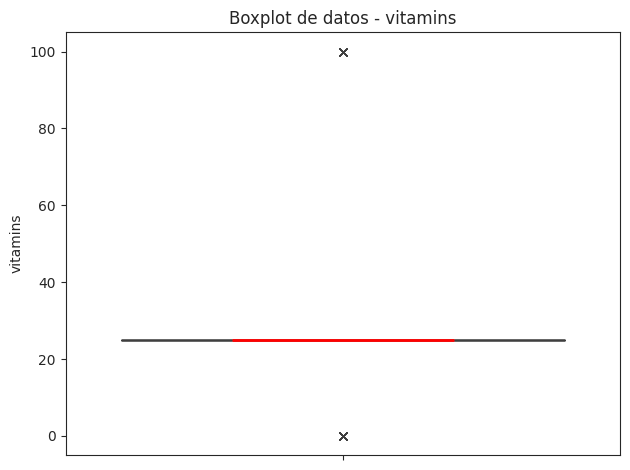

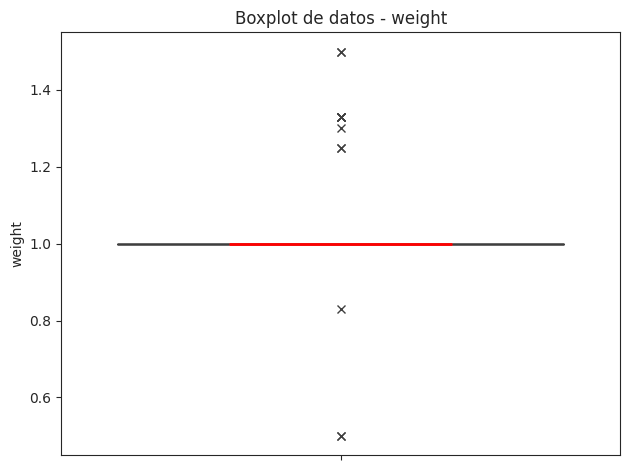

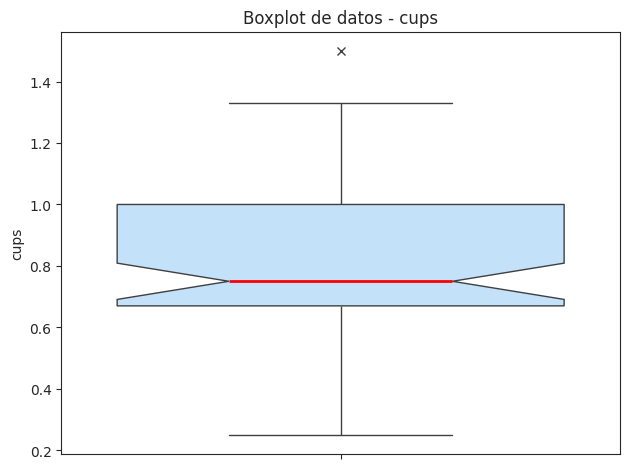

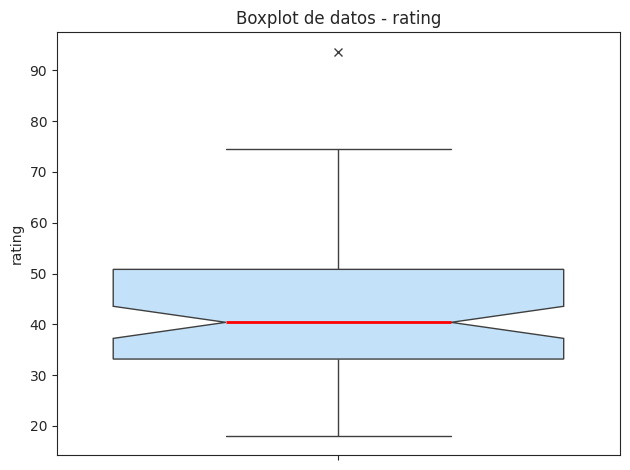

In [ ]:
for x in var_n:
    print("")
    box_plot_s(x,cereals_df)

## Categóricas

In [ ]:
def barras_cat(col,df):
    plt.subplots(figsize=(7,4))
    sns.set_style("ticks")
    ax = sns.countplot(x=col, data=df, color="#0039A6",
                       order = df[x].value_counts().index)

    patch_h = [patch.get_height() for patch in ax.patches]
    ax.patches[np.argmax(patch_h)].set_facecolor('red')
    ax.set_facecolor('none')
    plt.xticks(rotation="vertical")
    plt.title(f'Barplot de datos - {x}')
    plt.tight_layout()
    plt.show()

In [ ]:
var_c = [x for x in cereals_df.columns if x not in var_n]

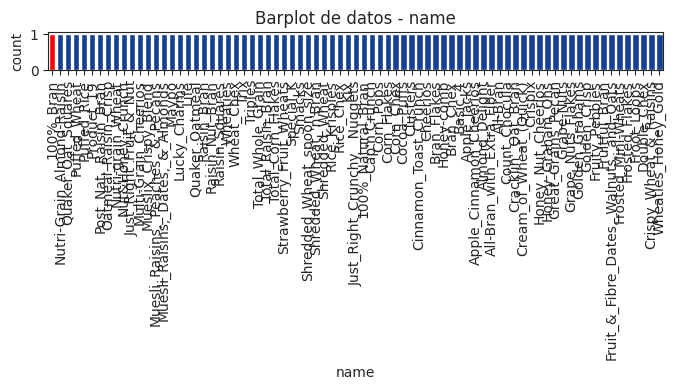

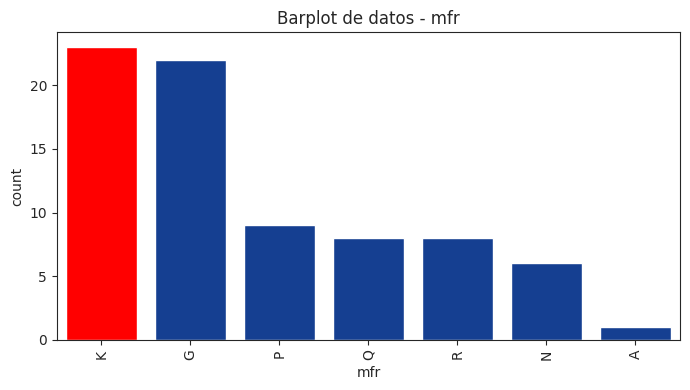

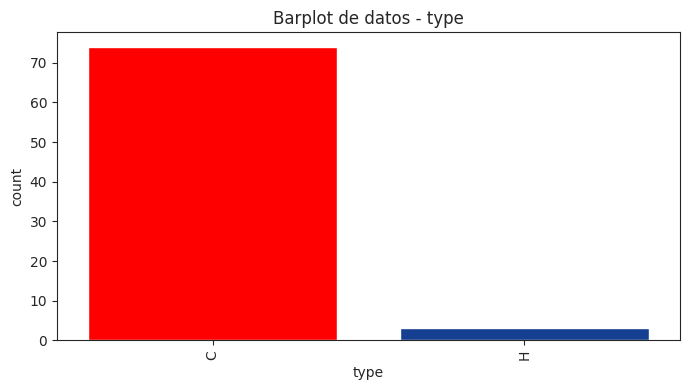

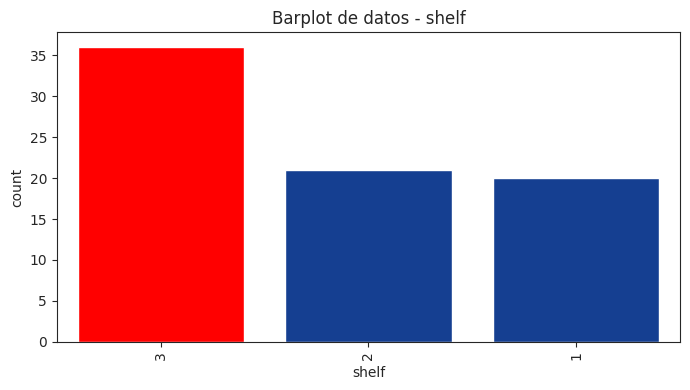

In [ ]:
for x in var_c:
    print()
    barras_cat(x,cereals_df)

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

In [ ]:
# Frecuencia de cada categoría en la columna 'mfr'
mfr_counts = cereals_df['mfr'].value_counts()
print("Frecuencia de cada categoría en 'mfr':")
print(mfr_counts)

# Frecuencia de cada categoría en la columna 'shelf'
shelf_counts = cereals_df['shelf'].value_counts()
print("Frecuencia de cada categoría en 'shelf':")
print(shelf_counts)

Frecuencia de cada categoría en 'mfr':
mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64
Frecuencia de cada categoría en 'shelf':
shelf
3    36
2    21
1    20
Name: count, dtype: int64


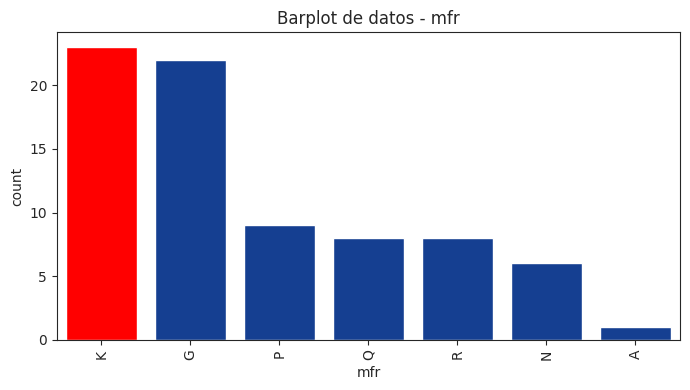

In [ ]:
plt.subplots(figsize=(7,4))
sns.set_style("ticks")
ax = sns.countplot(x="mfr", data=cereals_df, color="#0039A6",
                       order = cereals_df["mfr"].value_counts().index)

patch_h = [patch.get_height() for patch in ax.patches]
ax.patches[np.argmax(patch_h)].set_facecolor('red')
ax.set_facecolor('none')
plt.xticks(rotation="vertical")
plt.title(f'Barplot de datos - {"mfr"}')
plt.tight_layout()
plt.show()

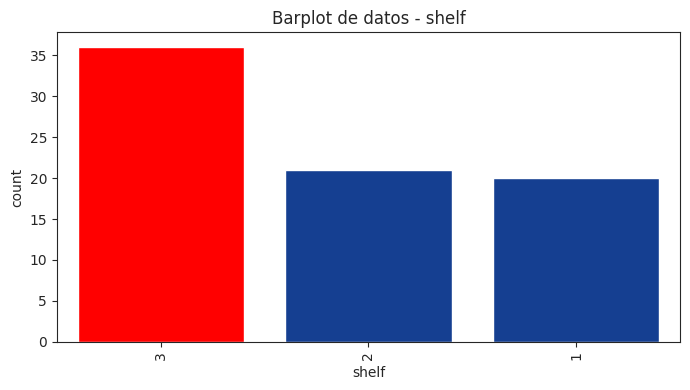

In [ ]:
barras_cat("shelf",cereals_df)

--------------

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

In [ ]:
# Agrupar por 'mfr' y 'shelf' y contar el número de productos en cada combinación
grouped_counts = cereals_df.groupby(['mfr', 'shelf']).size().reset_index(name='count')
print(grouped_counts)

   mfr  shelf  count
0    A      2      1
1    G      1      6
2    G      2      7
3    G      3      9
4    K      1      4
5    K      2      7
6    K      3     12
7    N      1      3
8    N      2      2
9    N      3      1
10   P      1      2
11   P      2      1
12   P      3      6
13   Q      1      1
14   Q      2      3
15   Q      3      4
16   R      1      4
17   R      3      4


<Axes: xlabel='mfr', ylabel='name'>

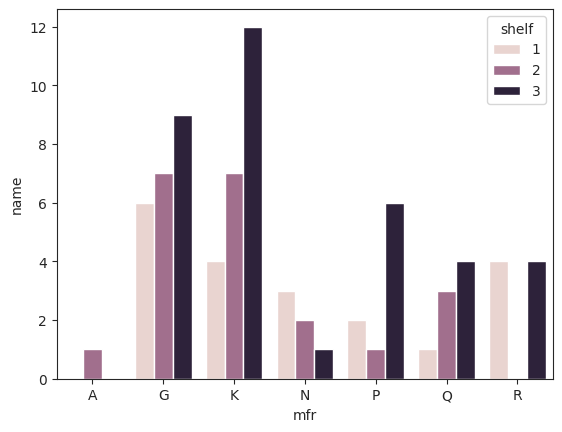

In [ ]:
grp= cereals_df.groupby(['mfr', 'shelf']).agg({'name': 'count'}).reset_index()
sns.barplot(data=grp, x='mfr', y='name', hue='shelf')


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

In [ ]:
counts,bin_edges=np.histogram(cereals_df['rating'],bins='auto')
table = pd.DataFrame({
    'bin_start': bin_edges[:-1],
    'bin_end': bin_edges[1:],
    'count': counts
})
print('El rango más frecuente es 33-40')
print(table)

El rango más frecuente es 33-40
   bin_start    bin_end  count
0  18.042851  25.609057      6
1  25.609057  33.175263     14
2  33.175263  40.741469     22
3  40.741469  48.307675     11
4  48.307675  55.873881     12
5  55.873881  63.440088      6
6  63.440088  71.006294      3
7  71.006294  78.572500      2
8  78.572500  86.138706      0
9  86.138706  93.704912      1


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [ ]:
#Cereal name, Evaluación rating, Fabricante mfr
rating_book=(cereals_df.groupby(['name','mfr']).rating.sum()).sort_values(ascending=False)[:10]
print("Los 10 cereales mejor evaluados")
rating_book

Los 10 cereales mejor evaluados


name                       mfr
All-Bran_with_Extra_Fiber  K      93.704912
Shredded_Wheat_'n'Bran     N      74.472949
Shredded_Wheat_spoon_size  N      72.801787
100%_Bran                  N      68.402973
Shredded_Wheat             N      68.235885
Cream_of_Wheat_(Quick)     N      64.533816
Puffed_Wheat               Q      63.005645
Puffed_Rice                Q      60.756112
Nutri-grain_Wheat          K      59.642837
All-Bran                   K      59.425505
Name: rating, dtype: float64

El Top ten es:
   index mfr     rating                   name
9     70   G  28.592785      Total_Raisin_Bran
8     29   P  28.025765         Fruity_Pebbles
7     73   G  27.753301                   Trix
6     42   G  26.734515           Lucky_Charms
5     31   G  23.804043         Golden_Grahams
4     14   G  22.736446            Cocoa_Puffs
3     18   G  22.396513          Count_Chocula
2     35   Q  21.871292       Honey_Graham_Ohs
1     12   G  19.823573  Cinnamon_Toast_Crunch
0     10   Q  18.042851           Cap'n'Crunch


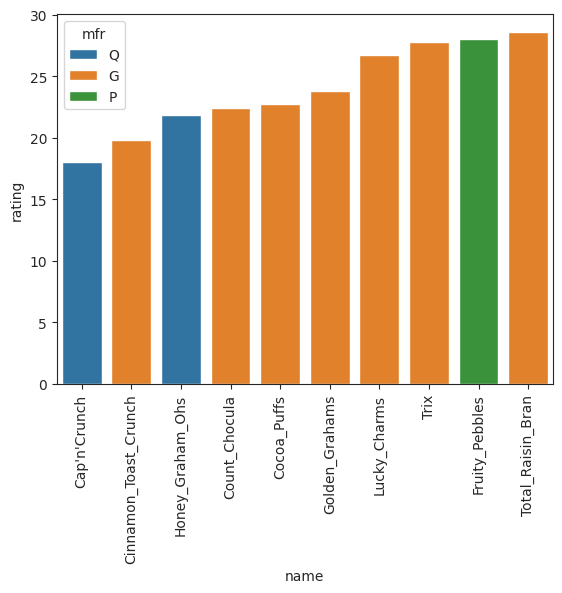

In [ ]:
top=cereals_df[['mfr','rating','name']].sort_values(by='rating')[:10].reset_index()


sns.barplot(data=top,x='name',y='rating', hue="mfr")
plt.xticks(rotation=90)
print('El Top ten es:')
print(top.sort_values(by='rating',ascending=False))

4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

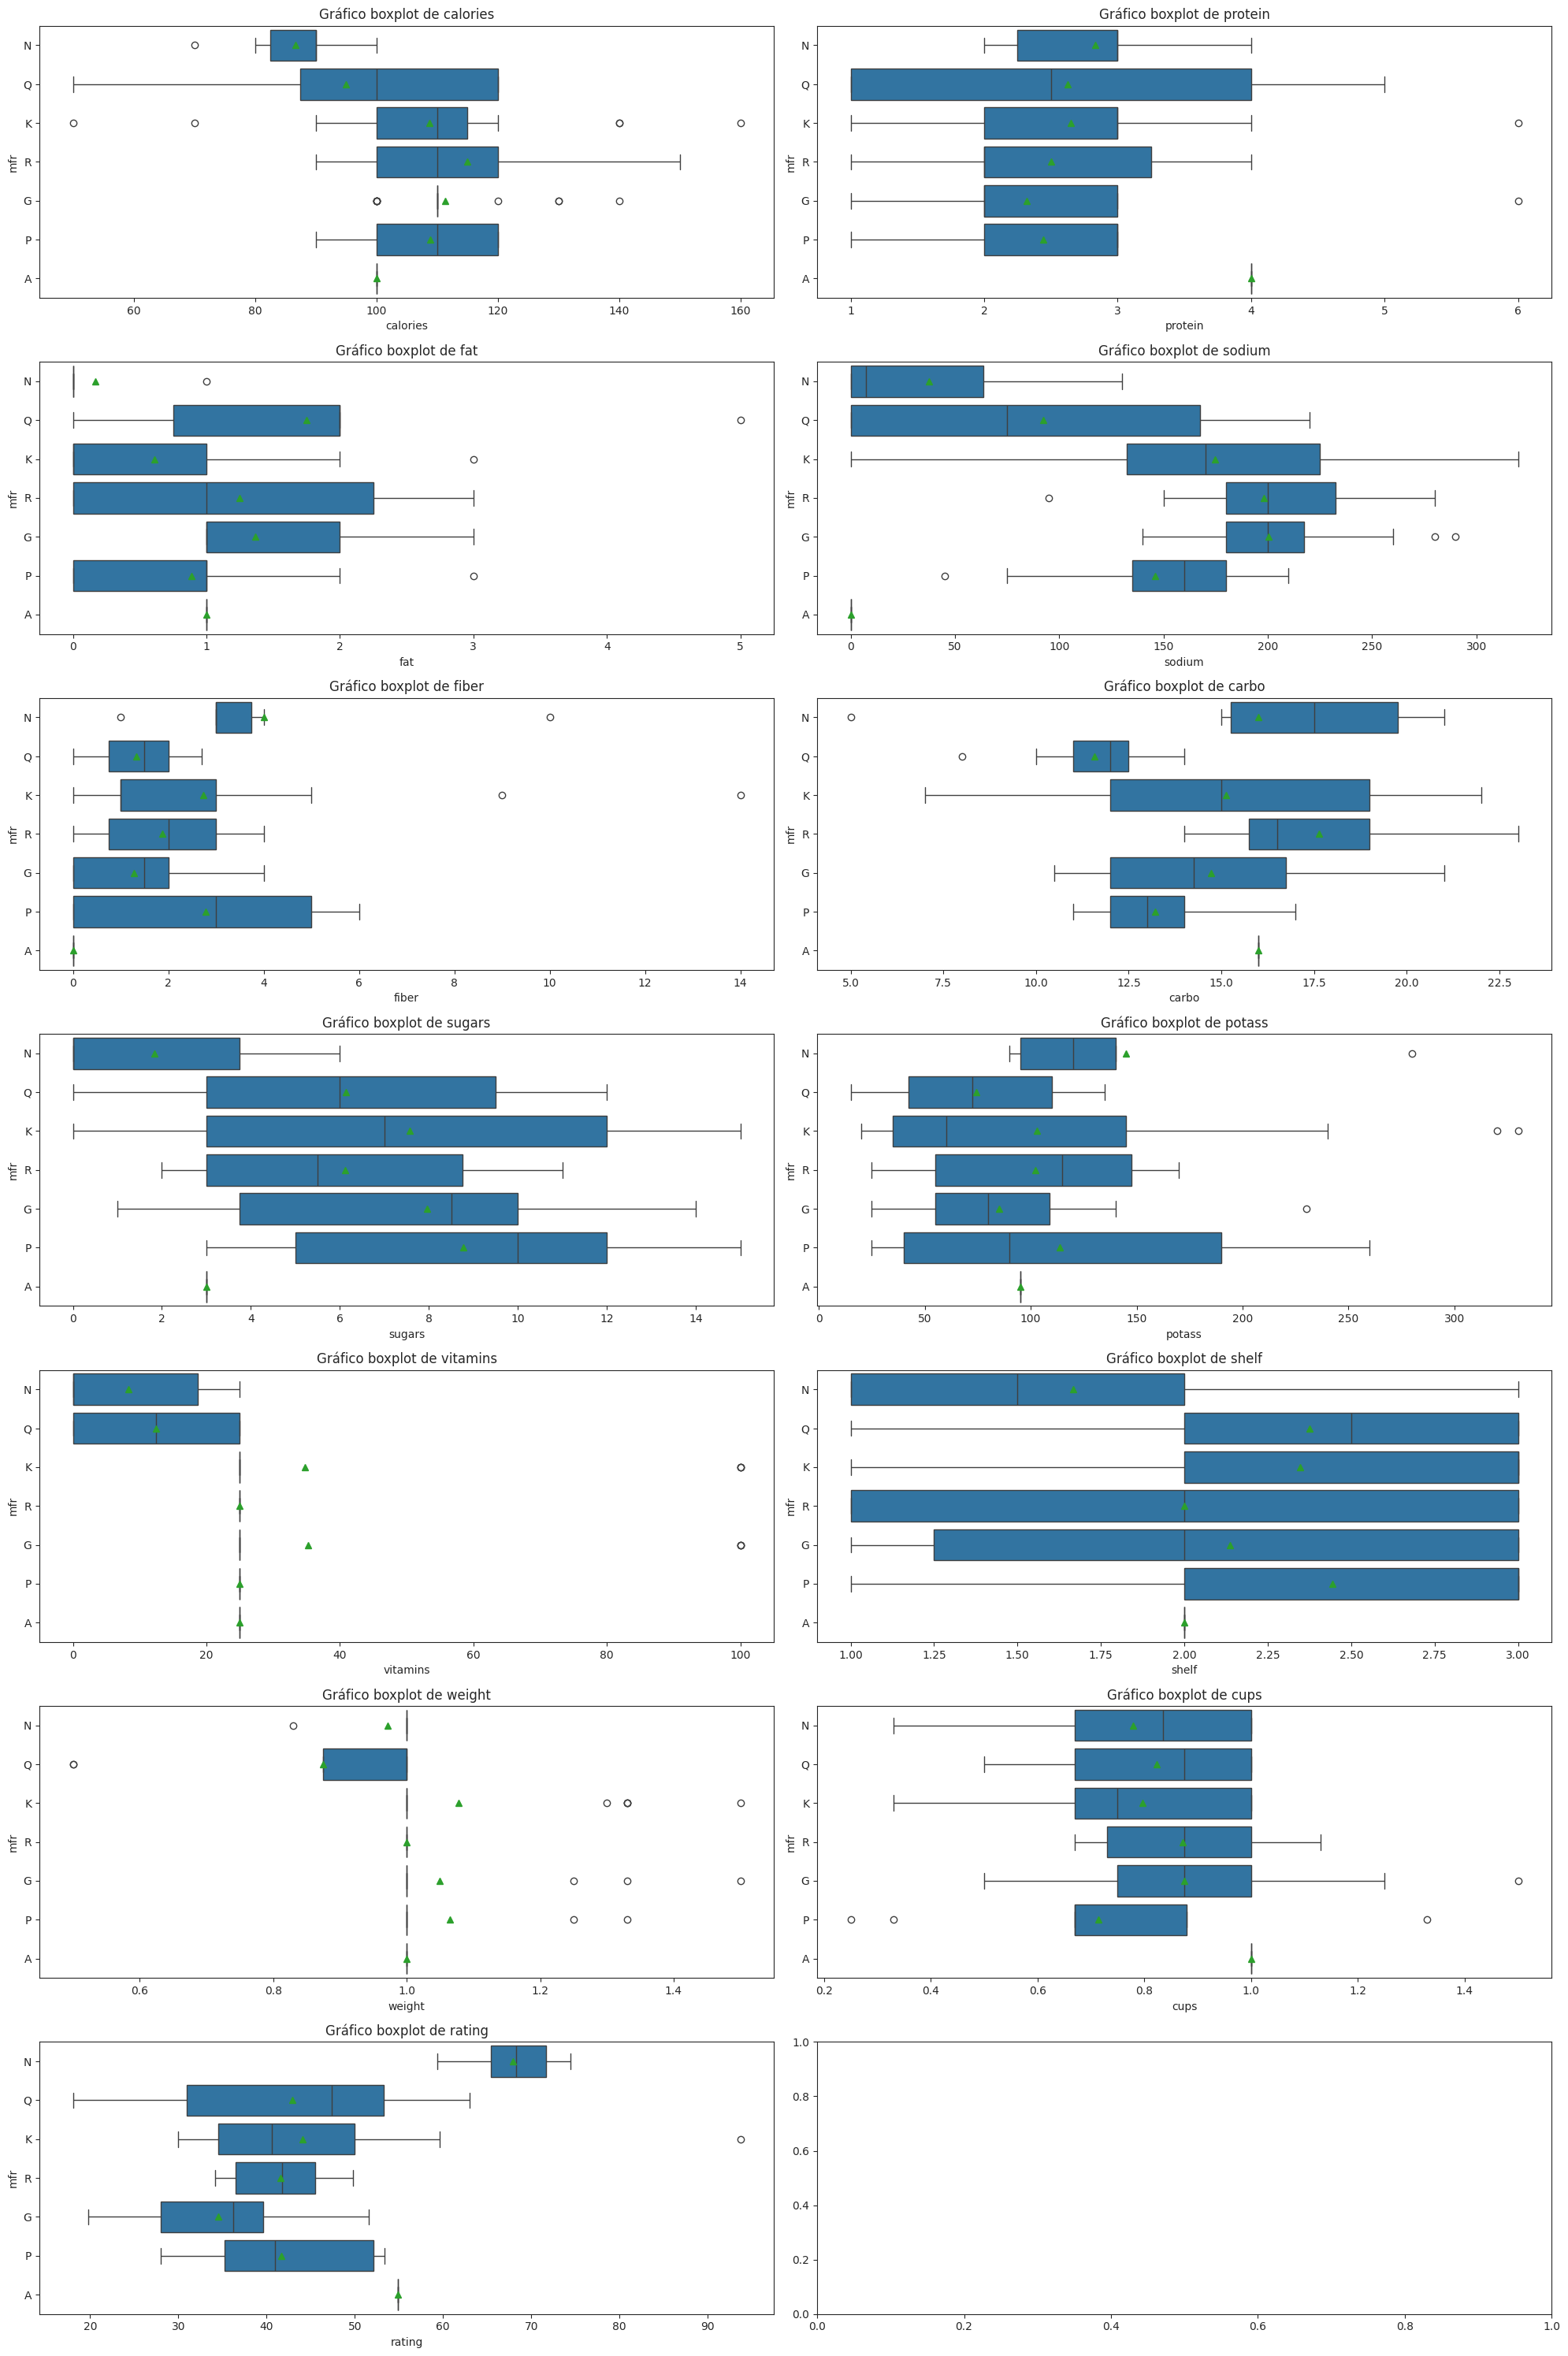

In [ ]:
#Se tienen 13 variables numéricas
numeric_df=cereals_df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"])
object_df=cereals_df.select_dtypes(include =["object"])

fig, axes = plt.subplots(7, 2, figsize=(20, 30))

for i, columna in enumerate(numeric_df):
    row = i // 2
    col = i % 2
    sns.boxplot(data=cereals_df, x=columna, y="mfr", ax=axes[row, col], showmeans=True)
    axes[row, col].set_title(f'Gráfico boxplot de {columna}')

plt.tight_layout()
plt.show()

<Axes: xlabel='mfr', ylabel='calories'>

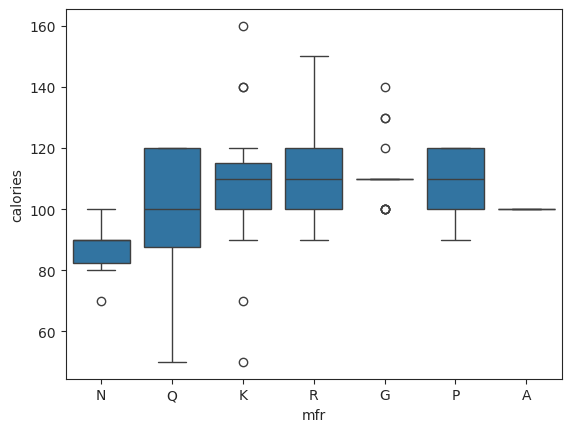

In [ ]:
sns.boxplot(data=cereals_df,x='mfr',y='calories')

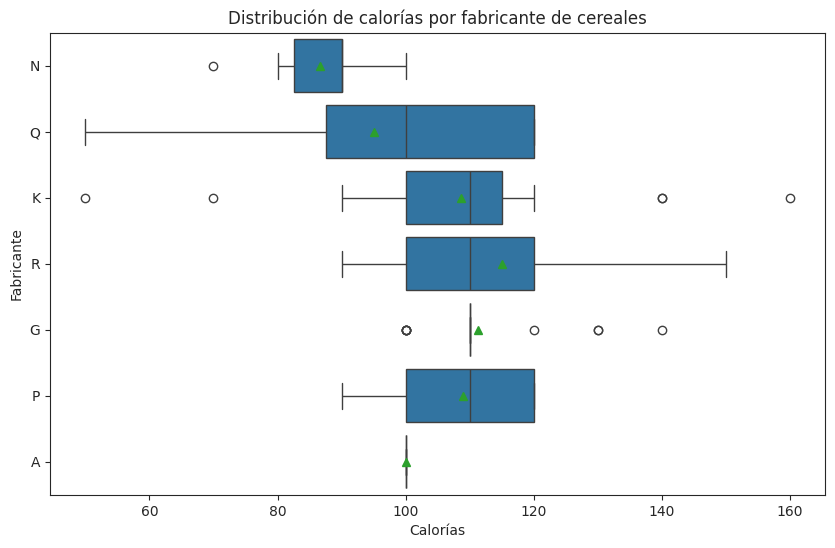

In [ ]:
#Se definen variables numéricas y categóricas
numeric_df=cereals_df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"])
object_df=cereals_df.select_dtypes(include =["object"])

#Se grafica boxplot para visualizar distribución de calorías por fabricante
plt.figure(figsize=(10, 6))
sns.boxplot(y='mfr', x='calories', data=cereals_df, showmeans=True)
plt.title('Distribución de calorías por fabricante de cereales')
plt.ylabel('Fabricante')
plt.xlabel('Calorías')
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

In [ ]:
# Calcular la matriz de correlación
cor_mat = numeric_df.corr()

# Seleccionar la fila correspondiente a 'target_var'
rating_corr = cor_mat['rating']

# Excluir la correlación de 'target_var' consigo misma
rating_corr = rating_corr.drop(labels=['rating'])

# Encontrar la variable con la mayor correlación
most_correlated_var = rating_corr.idxmax()
highest_correlation = rating_corr.max()

print(f"La variable que tiene la mayor correlación con 'target_var' es: {most_correlated_var}")
print(f"La correlación más alta es: {highest_correlation}")

La variable que tiene la mayor correlación con 'target_var' es: fiber
La correlación más alta es: 0.5841604199515836


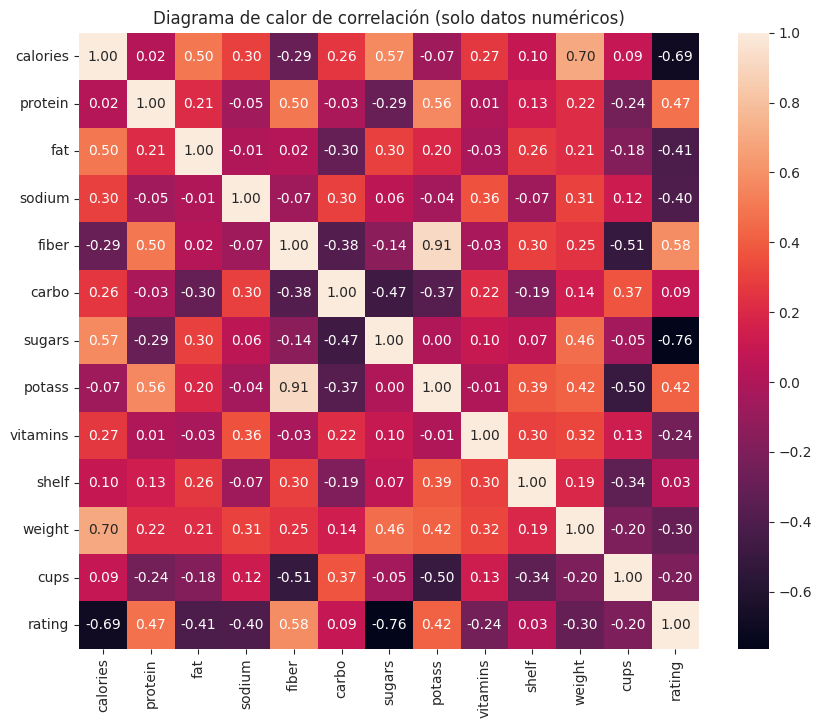

In [ ]:
#También se puede determinar visualmente
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, fmt=".2f")
plt.title('Diagrama de calor de correlación (solo datos numéricos)')
plt.show()

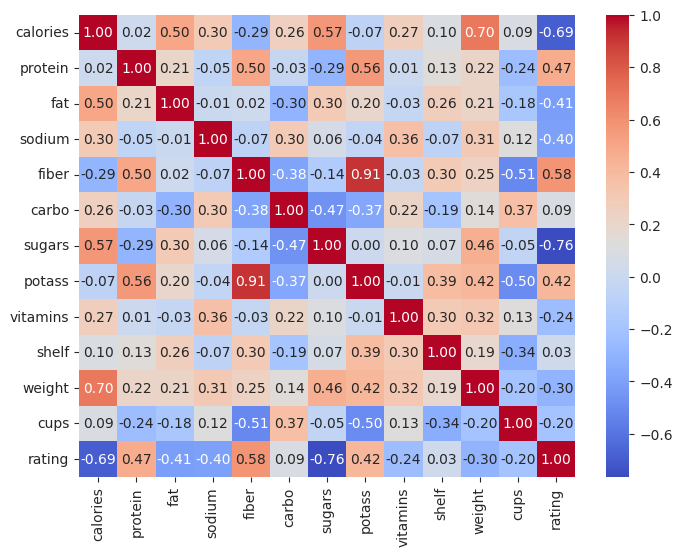

sugar y calories son las dos variables con mayor correlación negativa con rating y fiber y protein la mayor correlación positiva


In [ ]:
cm=cereals_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
print('sugar y calories son las dos variables con mayor correlación negativa con rating y fiber y protein la mayor correlación positiva')

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
# Eliminar todos los registros con algún dato faltante
cereals_df = cereals_df.dropna()

# Reiniciar el índice del dataframe
cereals_df = cereals_df.reset_index(drop=True)

# Mostrar el dataframe resultante
print(cereals_df)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4     Apple_Cinnamon_Cheerios   G    C       110        2    2     180    1.5   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
69                    Triples   G    C       110        2    1     250    0.0   
70                       Trix   G    C       110        1    1     140    0.0   
71                 Wheat_Chex   R    C       100        3    1     230    3.0   
72                   Wheaties   G    C       100        3    1     200    3.0   
73        Wheaties_Honey_Gold   G    C       110        2    1     200    1.0   

    carbo  sugars  potass  

# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
#Almacenar variable de salida en Y
y=cereals_df['rating']
#Almacenar predictores numéricos en X
X=cereals_df.select_dtypes(include=['float64','int64']).drop(columns=['rating'])
#Escalar valores de X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Aplicar PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

lrm = LinearRegression()
lrm.fit(X,y)

print('intercept', 'lrm.intercept_')
print(pd.DataFrame({'Predictor':  X.columns, 'coefficient': lrm.coef_}))

intercept lrm.intercept_
   Predictor   coefficient
0   calories -2.227242e-01
1    protein  3.273174e+00
2        fat -1.691408e+00
3     sodium -5.449270e-02
4      fiber  3.443480e+00
5      carbo  1.092451e+00
6     sugars -7.248951e-01
7     potass -3.399335e-02
8   vitamins -5.121197e-02
9      shelf -2.732644e-08
10    weight -5.057318e-07
11      cups  1.129722e-07


In [ ]:
import sklearn.decomposition
import sklearn.preprocessing

df=cereals_df.copy()
Y=df['rating']
X=df.drop(columns=['rating']).select_dtypes(exclude='object')
print(Y.head())
print(X.columns)
scaler=sklearn.preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)
pca=sklearn.decomposition.PCA()
X_pca=pca.fit_transform(X_scaled)

0    68.402973
1    33.983679
2    59.425505
3    93.704912
4    29.509541
Name: rating, dtype: float64
Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

Principal Components:

Component 1:
calories: 0.036594058071591745
protein: 0.33088765685995725
fat: 0.21254877462946667
sodium: -0.05089365951126472
fiber: 0.4586233006912047
carbo: -0.2686089549740952
sugars: 0.0814399579379582
potass: 0.5026030543435396
vitamins: 0.01883855790383243
shelf: 0.3089293534225957
weight: 0.25716014252709973
cups: -0.37115375801482114

Component 2:
calories: -0.5711420239540752
protein: 0.04536717472928076
fat: -0.2491432257870418
sodium: -0.30468418509973455
fiber: 0.20102931082510078
carbo: -0.17566042658159703
sugars: -0.3648439135103726
potass: 0.07034499441229801
vitamins: -0.30057387448235007
shelf: -0.0651144331848871
weight: -0.4489620557349561
cups: -0.10655265676233333

Component 3:
calories: -0.07792701701208192
protein: 0.3264052991150255
fat: -0.2912743394174788
sodium: 0.3431078989745615
fiber: 0.1739118201374043
carbo: 0.5130023612684281
sugars: -0.4953378415053681
potass: 0.13045958853680156
vitamins: 0.3275625392208598
shelf: 0.0005459324

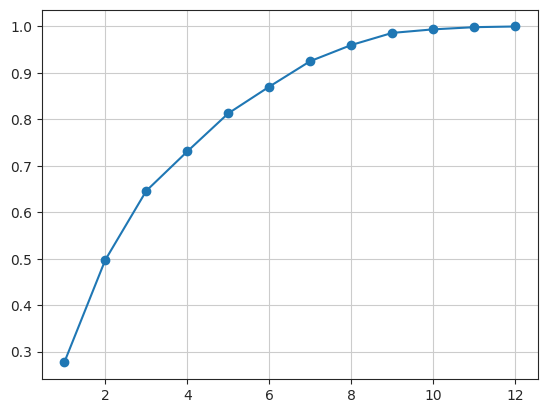

Con 7 componentes se alcanza al menos el 90% de la varianza
         col    result
0   calories -0.004882
1    protein -0.418610
2        fat  0.054129
3     sodium  0.167525
4      fiber  0.218240
5      carbo  0.172049
6     sugars -0.067793
7     potass  0.265667
8   vitamins -0.460537
9      shelf  0.416013
10    weight  0.076551
11      cups  0.500321


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01
mean,-6.001206e-18,7.689045e-17,-6.601326e-17,4.500904e-18,-9.751959e-18,-3.094372e-18,2.250452e-17
std,1.834353e+00,1.638119e+00,1.345545e+00,1.015633e+00,9.988804e-01,8.361984e-01,8.178536e-01
min,-3.297262e+00,-3.834955e+00,-3.014058e+00,-2.513701e+00,-1.717575e+00,-2.028847e+00,-1.566488e+00
25%,-1.201707e+00,-7.970513e-01,-1.066131e+00,-6.075655e-01,-5.928408e-01,-4.900642e-01,-5.649548e-01
50%,-4.220020e-01,-2.247782e-01,-1.631610e-01,-1.688075e-02,-1.372717e-01,7.801230e-02,1.051454e-02
75%,1.282776e+00,5.811757e-01,1.135143e+00,4.194347e-01,6.582637e-01,5.896727e-01,5.696389e-01
max,5.142814e+00,4.964342e+00,3.199283e+00,2.695212e+00,3.275506e+00,2.274381e+00,2.109580e+00


In [ ]:
components=pca.components_

print("Principal Components:")
for i, component in enumerate(components, 1):
    print(f"\nComponent {i}:")
    for j, feature in enumerate(X.columns):
        print(f"{feature}: {component[j]}")
ratio=pca.explained_variance_ratio_
ratio_acum=np.cumsum(ratio)
plt.plot(range(1, len(ratio_acum) + 1), ratio_acum, marker='o', linestyle='-')
plt.grid(True)
plt.show()
comp=pca.components_[7]
result=pd.DataFrame({'col':X.columns,'result':comp})
print('Con 7 componentes se alcanza al menos el 90% de la varianza')
print(result)
X_pca_selected = X_pca[:, :7]
columns = [f'PC{i+1}' for i in range(7)]

X_df_pca = pd.DataFrame(data=X_pca_selected, columns=columns)
X_df_pca.head()
X_df_pca.describe()

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


In [ ]:
comp1=pca.components_[0]
result1=pd.DataFrame({'col':X.columns,'result':comp1})
print('Las 3 features que tienen mayore relevancia en el primer [0] componenente son:')
print(result1.sort_values(by='result',ascending=False)[:3])

Las 3 features que tienen mayore relevancia en el primer [0] componenente son:
       col    result
7   potass  0.502603
4    fiber  0.458623
1  protein  0.330888


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

Chi-Square Test for name vs. rating:
Chi-Square Statistic: 5402.000000000001
P-Value: 0.23874236544393165


Chi-Square Test for mfr vs. rating:
Chi-Square Statistic: 443.99999999999994
P-Value: 0.4112602529018431


Chi-Square Test for type vs. rating:
Chi-Square Statistic: 74.00000000000003
P-Value: 0.4453048365105835




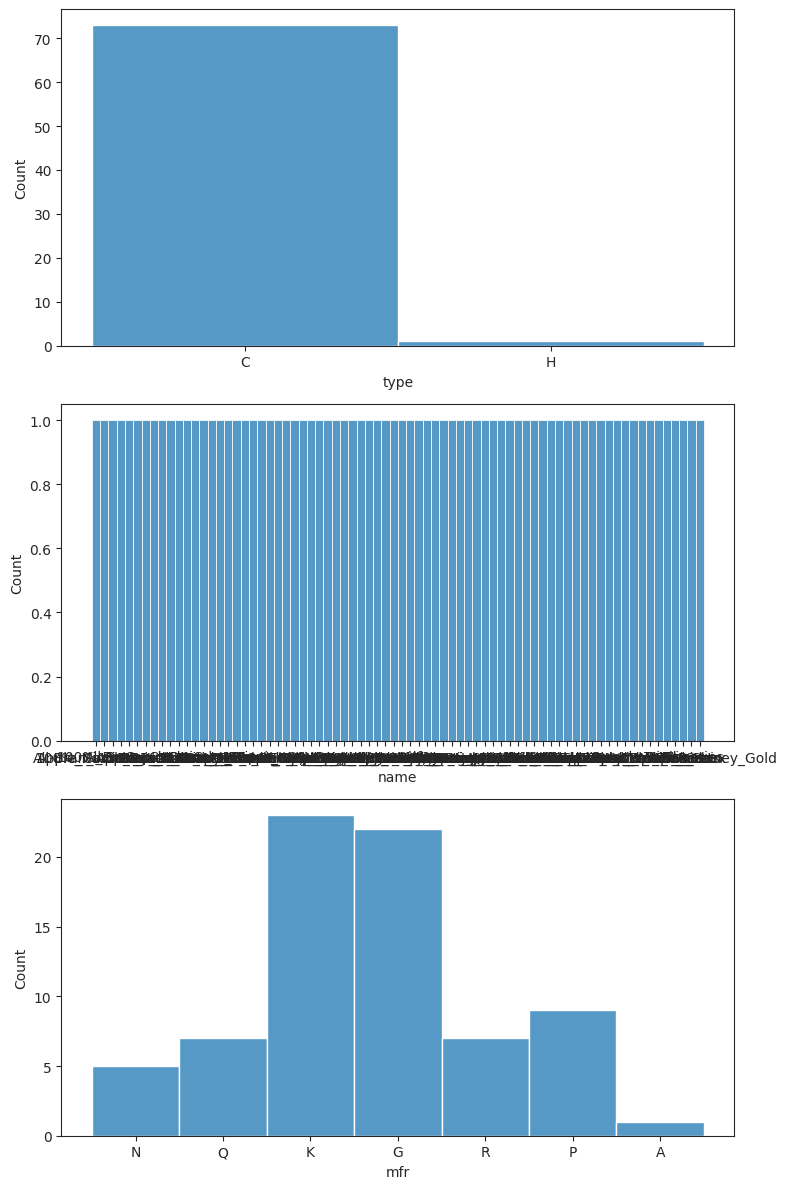

Aunque no es muy claro, Type tiene algunos componentes necesarios para quitarla
1. esta altamamente inbalanceada (73C,1H), siempre quedaria undersampled , y hacer un metodo para rebalancear no tiene sentido
2. en el analisis de Chi Squate fue la que tuvo p value mas alto
3. hace mas sentido tener mfr
           mfr_A      mfr_G      mfr_K      mfr_N      mfr_P      mfr_Q  \
count  74.000000  74.000000  74.000000  74.000000  74.000000  74.000000   
mean    0.013514   0.297297   0.310811   0.067568   0.121622   0.094595   
std     0.116248   0.460188   0.465985   0.252716   0.329079   0.294652   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   1.000000   1.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           mfr_R  
cou

In [ ]:
obj=df[['name','mfr','type','rating']]
cat=['name','mfr','type']
for var in cat:
    table = pd.crosstab(index=obj[var], columns=obj['rating'])
    chi2_stat, p_val, dof, expected = stats.chi2_contingency(table)
    print(f"Chi-Square Test for {var} vs. rating:")
    print("Chi-Square Statistic:", chi2_stat)
    print("P-Value:", p_val)


    print("\n")
fig, axes = plt.subplots(3, 1, figsize=(8, 12))
sns.histplot(obj['type'],ax=axes[0])
sns.histplot(obj['name'],ax=axes[1])
sns.histplot(obj['mfr'],ax=axes[2])
plt.tight_layout()
plt.show()
print('Aunque no es muy claro, Type tiene algunos componentes necesarios para quitarla'
      '\n1. esta altamamente inbalanceada (73C,1H), siempre quedaria undersampled , y hacer un metodo para rebalancear no tiene sentido'
      '\n2. en el analisis de Chi Squate fue la que tuvo p value mas alto'
        '\n3. hace mas sentido tener mfr')
obj=pd.get_dummies(obj[['mfr']])
obj_df=obj.astype(int)
print(obj_df.describe())

Name es una variable tipo ID no hace sentido agregarla a un análsis predictivo solo agregaría complejidad y un posible overfitting del modelo. Conservamos MFR

10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
result=pd.concat([X_df_pca,obj_df,Y],axis=1)
result
result.to_csv('result.csv')